In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [3]:
# Paso 1: Carga de datos

# Cargar el archivo
archivo = "local/BD_ordenes.xlsx"
df = pd.read_excel(archivo)

# Mostrar las primeras filas
df.head()

,RESPUESTA,CONSUMO_CRITICADO,SERVICIO,CATEGORIA,NIVEL_TENSION,ESTRATO,LOCALIDAD,FUNCION_ANALISIS,CALIFICACION,OBS_LECTURA,PERIODICIDAD
0,1,0.0,701-ENERGÍA MDO REGULADO,3-INDUSTRIAL,220.0,NaN,5088-BELLO,CALCCOPR - Calcular Consumo Penalizado de Ener...,5035-BAJO ENERGIA (<-50%),30-VARIACION NIVEL DE UTILIZACIÓN,1
1,1,420.0,701-ENERGÍA MDO REGULADO,3-INDUSTRIAL,220.0,NaN,5088-BELLO,CALCCOPR - Calcular Consumo Penalizado de Ener...,5080-MUY ALTO (>500%),30-VARIACION NIVEL DE UTILIZACIÓN,1
2,1,99999.0,101-AGUA POTABLE,1-RESIDENCIAL,NaN,1.0,5088-BELLO,CALCCOLE - Calcular Consumo por Lecturas,5080-MUY ALTO (>500%),34-LECTURA MENOR,1
3,1,881.0,701-ENERGÍA MDO REGULADO,3-INDUSTRIAL,220.0,NaN,5088-BELLO,CALCCOLE - Calcular Consumo por Lecturas,5080-MUY ALTO (>500%),35-NO HAY JUSTIFICACION,1
4,1,99999.0,701-ENERGÍA MDO REGULADO,1-RESIDENCIAL,220.0,4.0,5001-MEDELLÍN,CALCCOLE - Calcular Consumo por Lecturas,5080-MUY ALTO (>500%),34-LECTURA MENOR,1


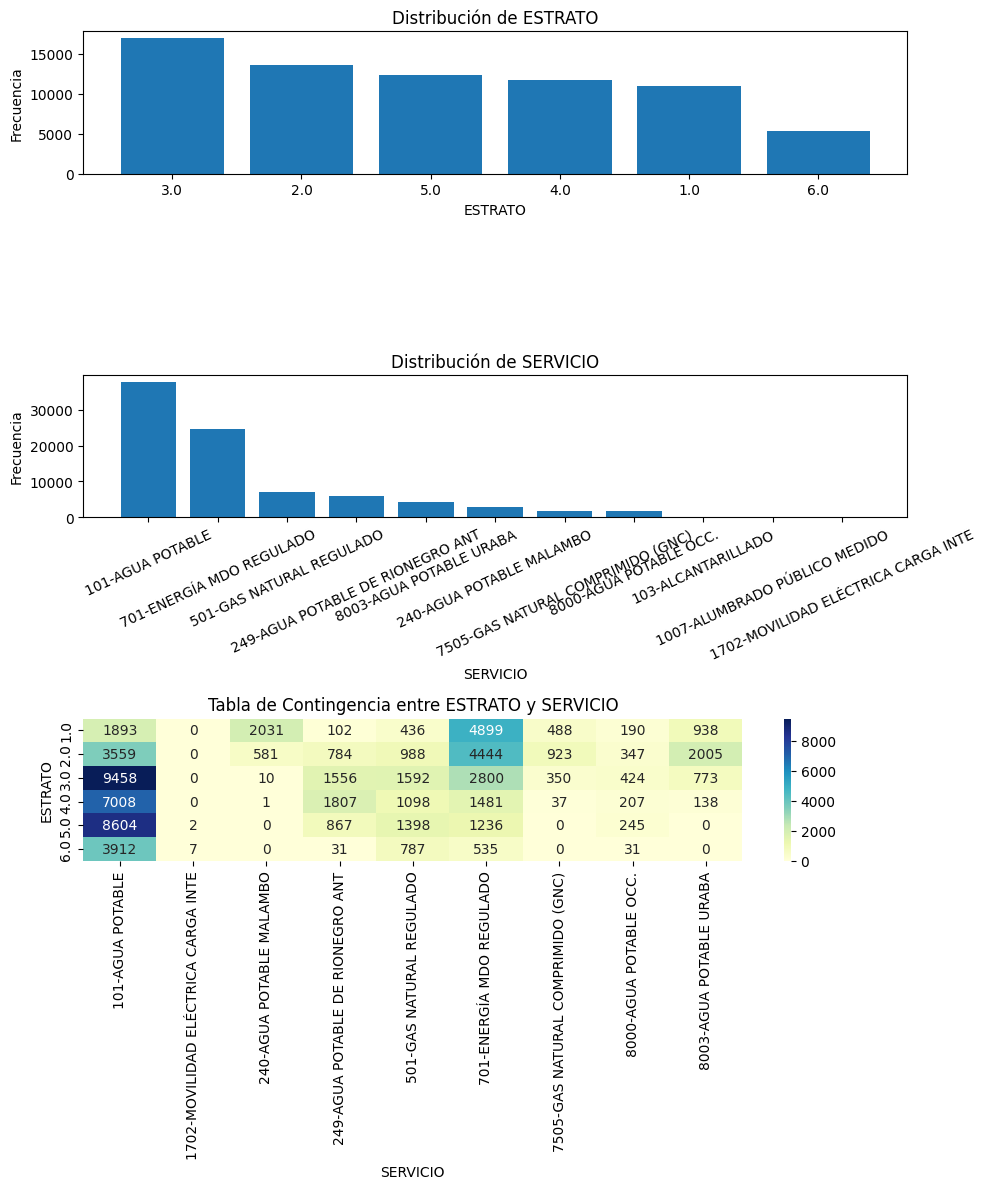

Análisis de la variable ESTRATO:
ESTRATO
3.0    16963
2.0    13631
5.0    12352
4.0    11777
1.0    10977
6.0     5303
Name: count, dtype: int64

Análisis de la variable SERVICIO:
SERVICIO
101-AGUA POTABLE                       37815
701-ENERGÍA MDO REGULADO               24553
501-GAS NATURAL REGULADO                6994
249-AGUA POTABLE DE RIONEGRO ANT        5933
8003-AGUA POTABLE URABA                 4221
240-AGUA POTABLE MALAMBO                2717
7505-GAS NATURAL COMPRIMIDO (GNC)       1854
8000-AGUA POTABLE OCC.                  1622
103-ALCANTARILLADO                        62
1007-ALUMBRADO PÚBLICO MEDIDO             31
1702-MOVILIDAD ELÉCTRICA CARGA INTE        9
Name: count, dtype: int64

Tabla de Contingencia entre ESTRATO y SERVICIO:
SERVICIO  101-AGUA POTABLE  1702-MOVILIDAD ELÉCTRICA CARGA INTE  \
ESTRATO                                                           
1.0                   1893                                    0   
2.0                   3559              

In [4]:


# Analyze the 'ESTRATO' variable
estrato_counts = df['ESTRATO'].value_counts()

# Analyze the 'SERVICIO' variable
servicio_counts = df['SERVICIO'].value_counts()

# Create contingency table for ESTRATO and SERVICIO
contingency_table = pd.crosstab(df['ESTRATO'], df['SERVICIO'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Plot the analysis results
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Plot for ESTRATO
axes[0].bar(estrato_counts.index.astype(str), estrato_counts.values)
axes[0].set_title('Distribución de ESTRATO')
axes[0].set_xlabel('ESTRATO')
axes[0].set_ylabel('Frecuencia')

# Plot for SERVICIO
axes[1].bar(servicio_counts.index.astype(str), servicio_counts.values)
axes[1].set_title('Distribución de SERVICIO')
axes[1].set_xlabel('SERVICIO')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=25)

# Heatmap for contingency table
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', ax=axes[2])
axes[2].set_title('Tabla de Contingencia entre ESTRATO y SERVICIO')
axes[2].set_xlabel('SERVICIO')
axes[2].set_ylabel('ESTRATO')

plt.tight_layout()
#plt.savefig('analisis_estrato_servicio.png')
plt.show()

# Print the analysis results
print("Análisis de la variable ESTRATO:")
print(estrato_counts)
print("\nAnálisis de la variable SERVICIO:")
print(servicio_counts)
print("\nTabla de Contingencia entre ESTRATO y SERVICIO:")
print(contingency_table)
print("\nResultados del test Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Tabla esperada:")
print(expected)



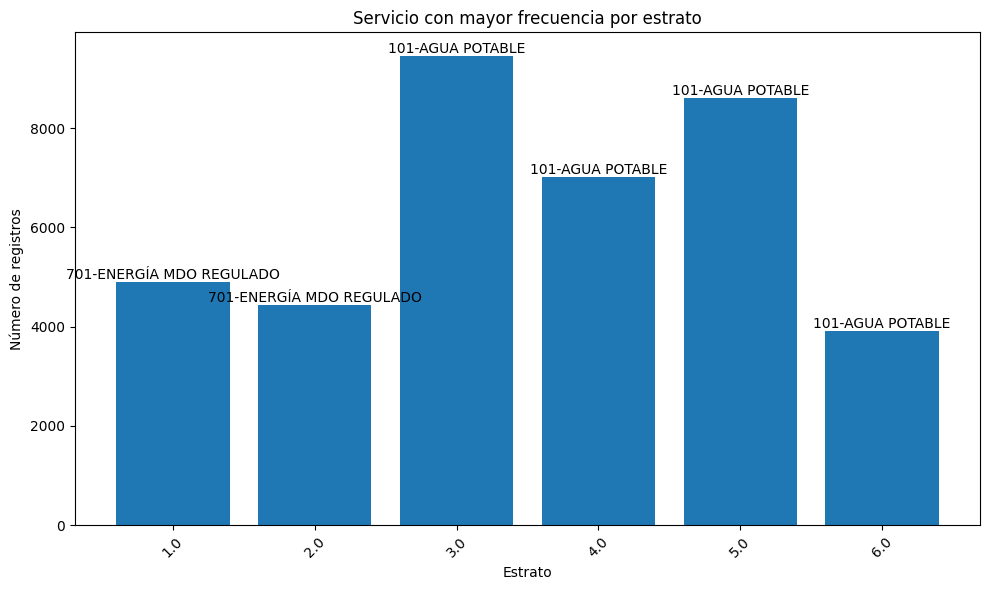

Servicio con mayor frecuencia por estrato:
ESTRATO
1.0    701-ENERGÍA MDO REGULADO
2.0    701-ENERGÍA MDO REGULADO
3.0            101-AGUA POTABLE
4.0            101-AGUA POTABLE
5.0            101-AGUA POTABLE
6.0            101-AGUA POTABLE
Name: SERVICIO, dtype: object


In [5]:
# Agrupar por 'ESTRATO' y encontrar el servicio con más registros para cada estrato
most_common_service_per_estrato = df.groupby('ESTRATO')['SERVICIO'].agg(lambda x: x.value_counts().idxmax())
service_counts_per_estrato = df.groupby(['ESTRATO', 'SERVICIO']).size().unstack().max(axis=1)

# Graficar los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(service_counts_per_estrato.index.astype(str), service_counts_per_estrato.values)

# Añadir etiquetas a las barras
for bar, label in zip(bars, most_common_service_per_estrato):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

plt.title('Servicio con mayor frecuencia por estrato')
plt.xlabel('Estrato')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('servicio_mayor_frecuencia_por_estrato.png')
plt.show()

# Imprimir los resultados
print("Servicio con mayor frecuencia por estrato:")
print(most_common_service_per_estrato)


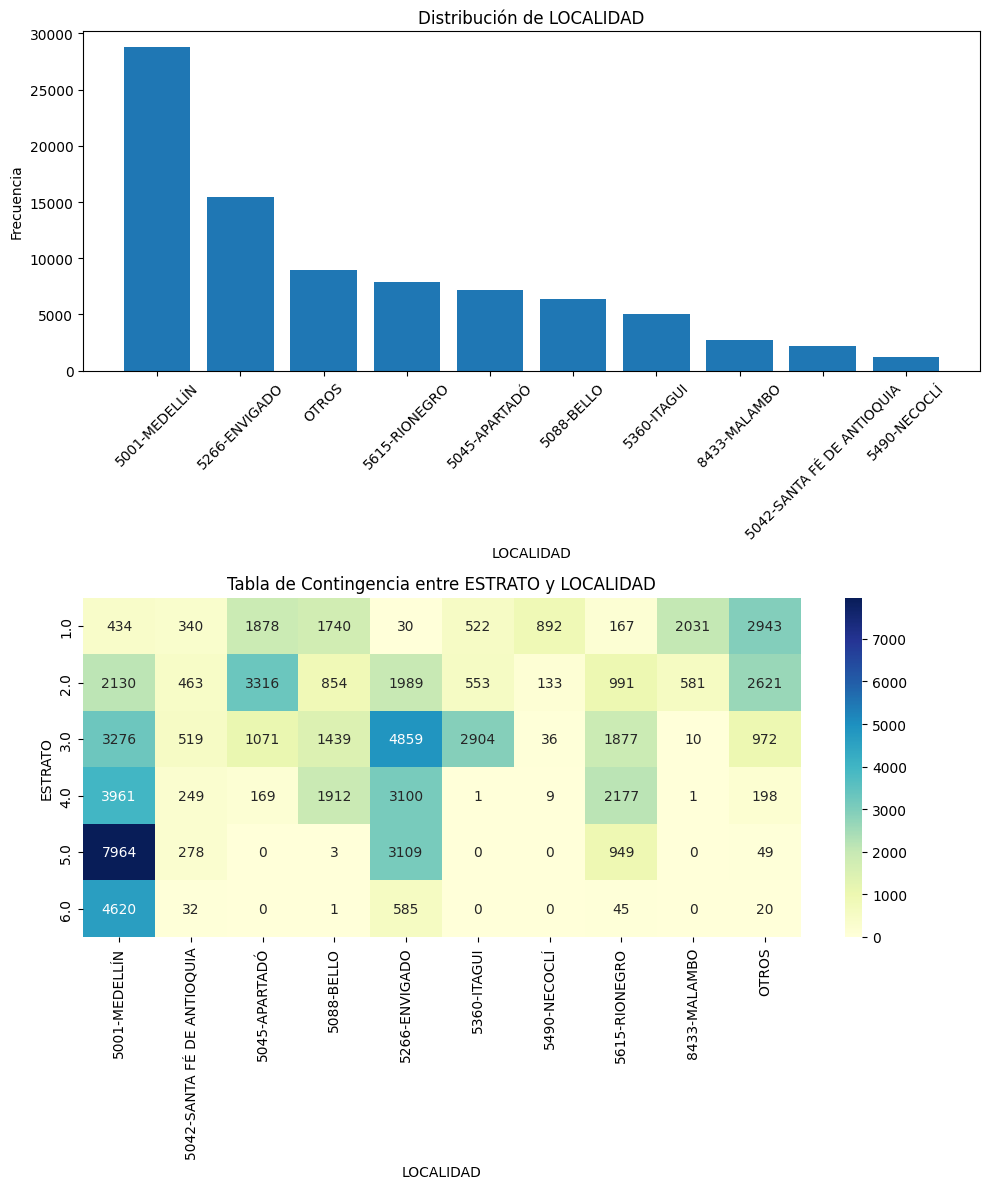

Análisis de la variable LOCALIDAD:
PARTICIPACION_LOCALIDAD
5001-MEDELLÍN                 28755
5266-ENVIGADO                 15485
OTROS                          8986
5615-RIONEGRO                  7903
5045-APARTADÓ                  7153
5088-BELLO                     6369
5360-ITAGUI                    5039
8433-MALAMBO                   2717
5042-SANTA FÉ DE ANTIOQUIA     2201
5490-NECOCLÍ                   1203
Name: count, dtype: int64

Tabla de Contingencia entre ESTRATO y LOCALIDAD:
PARTICIPACION_LOCALIDAD  5001-MEDELLÍN  5042-SANTA FÉ DE ANTIOQUIA  \
ESTRATO                                                              
1.0                                434                         340   
2.0                               2130                         463   
3.0                               3276                         519   
4.0                               3961                         249   
5.0                               7964                         278   
6.0            

In [6]:

# Calcular la participación de cada localidad
locality_counts = df['LOCALIDAD'].value_counts()
total_records = len(df)
locality_participation = locality_counts / total_records

# Crear una nueva variable PARTICIPACION_LOCALIDAD
df['PARTICIPACION_LOCALIDAD'] = df['LOCALIDAD'].apply(lambda x: x if locality_participation[x] >= 0.01 else 'OTROS')

# Analyze the 'LOCALIDAD' variable
localidad_counts = df['PARTICIPACION_LOCALIDAD'].value_counts()

# Create contingency table for ESTRATO and LOCALIDAD
contingency_table_dos = pd.crosstab(df['ESTRATO'], df['PARTICIPACION_LOCALIDAD'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_dos)

# Plot the analysis results
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))


# Plot for LOCALIDAD
axes[0].bar(localidad_counts.index.astype(str), localidad_counts.values)
axes[0].set_title('Distribución de LOCALIDAD')
axes[0].set_xlabel('LOCALIDAD')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Heatmap for contingency table
sns.heatmap(contingency_table_dos, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1])
axes[1].set_title('Tabla de Contingencia entre ESTRATO y LOCALIDAD')
axes[1].set_xlabel('LOCALIDAD')
axes[1].set_ylabel('ESTRATO')

plt.tight_layout()
#plt.savefig('analisis_estrato_servicio.png')
plt.show()

print("Análisis de la variable LOCALIDAD:")
print(localidad_counts)
print("\nTabla de Contingencia entre ESTRATO y LOCALIDAD:")
print(contingency_table_dos)
print("\nResultados del test Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Tabla esperada:")
print(expected)

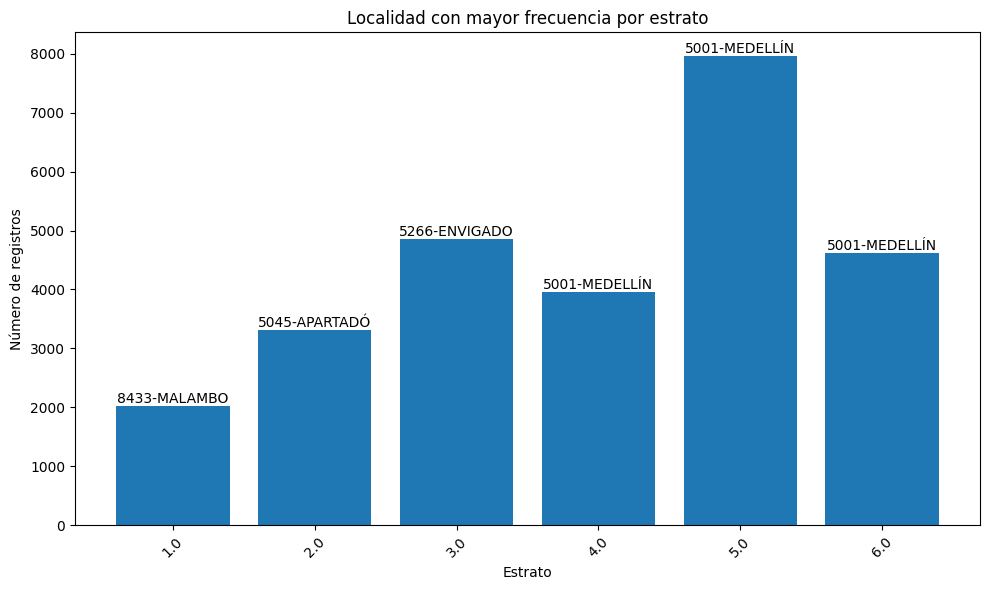

Localidad con mayor frecuencia por estrato:
ESTRATO
1.0     8433-MALAMBO
2.0    5045-APARTADÓ
3.0    5266-ENVIGADO
4.0    5001-MEDELLÍN
5.0    5001-MEDELLÍN
6.0    5001-MEDELLÍN
Name: LOCALIDAD, dtype: object


In [7]:
# Agrupar por 'ESTRATO' y encontrar la localidad con más registros para cada estrato
mas_comun_servicio_por_localidad = df.groupby('ESTRATO')['LOCALIDAD'].agg(lambda x: x.value_counts().idxmax())
servicio_counts_por_localidad = df.groupby(['ESTRATO', 'LOCALIDAD']).size().unstack().max(axis=1)

# Graficar los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(servicio_counts_por_localidad.index.astype(str), servicio_counts_por_localidad.values)

# Añadir etiquetas a las barras
for bar, label in zip(bars, mas_comun_servicio_por_localidad):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom')

plt.title('Localidad con mayor frecuencia por estrato')
plt.xlabel('Estrato')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Localidad_mayor_frecuencia_por_estrato.png')
plt.show()

# Imprimir los resultados
print("Localidad con mayor frecuencia por estrato:")
print(mas_comun_servicio_por_localidad)